## ENIGH - using Factor Analysis

In [14]:
# import necessary libraries

import requests
import zipfile
import pandas as pd
pd.options.display.max_columns = 200
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis

import warnings
warnings.filterwarnings("ignore")


In [15]:
#
#https://www.inegi.org.mx/programas/enigh/nc/2024/#microdatos

url = "https://www.inegi.org.mx/contenidos/programas/enigh/nc/2024/microdatos/enigh2024_ns_concentradohogar_csv.zip"
file_name = "enigh2024_ns_concentradohogar_csv.zip"

response = requests.get(url)

if response.status_code == 200:
    with open(file_name, "wb") as f:
        f.write(response.content)
    print(f"File downloaded successfully: {file_name}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

File downloaded successfully: enigh2024_ns_concentradohogar_csv.zip


In [16]:
# Load the files
#

zip_file_name = 'enigh2024_ns_concentradohogar_csv.zip'
csv_file_name = 'concentradohogar.csv'

with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extract(csv_file_name)

print(f"Successfully extracted {csv_file_name} from {zip_file_name}")


Successfully extracted concentradohogar.csv from enigh2024_ns_concentradohogar_csv.zip


In [17]:
#

df = pd.read_csv('concentradohogar.csv')

df.head()

,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,p12_64,p65mas,ocupados,percep_ing,perc_ocupa,ing_cor,ingtrab,trabajo,sueldos,horas_extr,comisiones,aguinaldo,indemtrab,otra_rem,remu_espec,negocio,noagrop,industria,comercio,servicios,agrope,agricolas,pecuarios,reproducc,pesca,otros_trab,rentas,utilidad,arrenda,transfer,jubilacion,becas,donativos,remesas,bene_gob,transf_hog,trans_inst,estim_alqu,otros_ing,gasto_mon,alimentos,ali_dentro,cereales,carnes,pescado,leche,huevo,aceites,tuberculo,verduras,frutas,azucar,cafe,especias,otros_alim,bebidas,ali_fuera,tabaco,vesti_calz,vestido,calzado,vivienda,alquiler,pred_cons,agua,energia,limpieza,cuidados,utensilios,enseres,salud,ambul_serv,aten_hosp,medic_prod,transporte,publico,foraneo,adqui_vehi,mantenim,refaccion,combus,comunica,educa_espa,educacion,esparci,paq_turist,personales,cuida_pers,acces_pers,otros_gas,transf_gas,percep_tot,retiro_inv,prestamos,otras_perc,ero_nm_viv,ero_nm_hog,erogac_tot,cuota_viv,mater_serv,material,servicio,deposito,prest_terc,pago_tarje,deudas,balance,otras_erog,smg
0,100001901,1,1001,1,3,1,1,207,2,1,32,6,4,2,2,2,2,2,0,2,2,2,138232.38,130518.10,130518.10,78299.99,18195.64,0.0,9048.90,0.0,4402.17,20571.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7714.28,0.0,0.0,0.0,0.0,0.0,7714.28,0.00,0.00,0.0,47478.66,17858.49,8421.36,809.99,835.70,0.00,1954.28,385.71,0.00,0.00,347.13,0.00,0.00,0.0,0.00,3728.56,359.99,9437.13,0.0,635.86,0.00,635.86,6475.63,4354.83,0.0,1200.0,920.80,3811.92,3811.92,0.0,0.0,0.00,0.00,0.0,0.00,9929.03,0.00,0.0,0.0,6967.74,0.0,6967.74,2961.29,8651.61,8651.61,0.00,0.00,116.12,116.12,0.00,0.00,0.00,13499.97,0.00,0.00,0.0,0.0,13499.97,29582.60,0.00,0.00,0.00,0.0,21365.21,0.00,0.00,8217.39,0.0,0.00,22403.7
1,100001902,1,1001,1,3,1,1,207,2,1,48,9,4,2,2,4,0,4,0,2,2,2,118014.04,103829.72,103829.72,76304.34,0.00,0.0,9782.60,0.0,0.00,17742.78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2571.42,0.0,0.0,0.0,0.0,0.0,2571.42,0.00,11612.90,0.0,38782.74,22384.13,13641.30,1079.96,4114.27,0.00,1182.84,0.00,2314.28,385.71,964.27,0.00,0.00,0.0,0.00,2571.42,1028.55,8742.83,0.0,0.00,0.00,0.00,1990.00,0.00,100.0,990.0,900.00,1637.39,1637.39,0.0,0.0,0.00,0.00,0.0,0.00,8796.76,0.00,0.0,0.0,4354.83,0.0,4354.83,4441.93,839.02,0.00,839.02,0.00,3135.44,3135.44,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,8709.67,8709.67,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,22403.7
2,100001904,1,1001,1,3,1,1,207,2,2,60,6,2,1,1,2,0,2,0,2,2,2,46866.32,45580.61,45580.61,41086.94,0.00,0.0,122.28,0.0,0.00,4371.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1285.71,0.0,0.0,0.0,0.0,0.0,1285.71,0.00,0.00,0.0,28601.26,9382.81,9382.81,2005.70,1928.56,0.00,1131.41,617.14,0.00,0.00,1115.73,128.57,642.85,0.0,527.14,1285.71,0.00,0.00,0.0,0.00,0.00,0.00,4731.86,2903.22,0.0,585.0,1243.64,966.74,966.74,0.0,0.0,1128.91,489.13,0.0,639.78,11009.03,0.00,0.0,0.0,6967.74,0.0,6967.74,4041.29,0.00,0.00,0.00,0.00,1381.91,1381.91,0.00,0.00,0.00,5435.96,0.00,0.00,0.0,0.0,5435.96,4695.65,0.00,0.00,0.00,0.0,4695.65,0.00,0.00,0.00,0.0,0.00,22403.7
3,100001905,1,1001,1,3,1,1,207,2,1,43,8,4,3,1,4,0,4,0,3,3,3,110430.10,97169.95,97169.95,70923.89,586.95,0.0,3668.47,0.0,4402.17,17588.47,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,195.64,0.0,0.0,0.0,0.0,0.0,0.00,195.64,13064.51,0.0,43509.83,23682.69,23682.69,4152.83,4782.84,0.00,3162.83,1465.71,0.00,707.13,2378.54,694.28,0.00,0.0,0.00,4641.41,1697.12,0.00,0.0,2885.85,2885.85,0.00,1873.96,0.00,137.5,591.0,1145.46,1184.48,1184.48,0.0,0.0,19.56,0.00,0.0,19.56,7068.64,192.85,0.0,0.0,3483.86,0.0,3483.86,3391.93,4239.86,88.04,4151.82,0.00,2554.79,2554.79,0.00,0.00,0.00,6847.82,0.00,6847.82,0.0,0.0,0.00,22768.99,0.00,366.84,366.84,0.0,5869.56,0.00,7336.95,2934.78,0.0,6260.86,22403.7
4,100002501,1,1001,1,2,2,2,196,2,2,29,8,4,1,3,2,2,2,0,2,2,2,99494.12,93687.67,93687.67,57975.64,1956.52,0.0,13695.64,0.0,6945.64,13114.23,0.0,0.0,0.0,

In [18]:
#
columnas = df.columns

columnas

Index(['folioviv', 'foliohog', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis',
       'upm', 'factor', 'clase_hog', 'sexo_jefe',
       ...
       'mater_serv', 'material', 'servicio', 'deposito', 'prest_terc',
       'pago_tarje', 'deudas', 'balance', 'otras_erog', 'smg'],
      dtype='object', length=126)

## Objetivo:

$$GastoSalud_h = \beta_0 + \mathbf{X}_h \boldsymbol{\beta} + \varepsilon_h$$

Donde $h = 1, 2, 3, ..., N$ y $\mathbf{X}_h$ es una matriz que contiene todas variables que podría emplicar el fenómeno.

Definición de variables: https://www.inegi.org.mx/contenidos/programas/enigh/nc/2024/microdatos/889463924494.pdf

In [19]:
# Select variables

df_sel = df[[ 'folioviv', 'foliohog', 'ubica_geo', 'tam_loc', 'est_socio', 'est_dis',
              'upm', 'factor', 'sexo_jefe', 'edad_jefe', 'tot_integ', 'hombres', 'mujeres',
              'mayores', 'menores', 'percep_ing', 'ing_cor', 'ingtrab', 'bene_gob',
              'gasto_mon', 'alimentos', 'vesti_calz', 'energia', 'salud' ]]

df_sel

,folioviv,foliohog,ubica_geo,tam_loc,est_socio,est_dis,upm,factor,sexo_jefe,edad_jefe,tot_integ,hombres,mujeres,mayores,menores,percep_ing,ing_cor,ingtrab,bene_gob,gasto_mon,alimentos,vesti_calz,energia,salud
0,100001901,1,1001,1,3,1,1,207,1,32,4,2,2,2,2,2,138232.38,130518.10,0.00,47478.66,17858.49,635.86,920.80,0.00
1,100001902,1,1001,1,3,1,1,207,1,48,4,2,2,4,0,2,118014.04,103829.72,0.00,38782.74,22384.13,0.00,900.00,0.00
2,100001904,1,1001,1,3,1,1,207,2,60,2,1,1,2,0,2,46866.32,45580.61,0.00,28601.26,9382.81,0.00,1243.64,1128.91
3,100001905,1,1001,1,3,1,1,207,1,43,4,3,1,4,0,3,110430.10,97169.95,0.00,43509.83,23682.69,2885.85,1145.46,19.56
4,100002501,1,1001,1,2,2,2,196,2,29,4,1,3,2,2,2,99494.12,93687.67,0.00,132552.40,39207.49,19639.48,1062.14,7767.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,3260593814,1,32052,4,2,680,10593,183,1,47,3,1,2,3,0,2,40111.46,36511.46,0.00,19501.06,9578.44,0.00,1080.00,0.00
91410,3260593815,1,32052,4,2,680,10593,183,1,31,5,3,2,2,3,2,87698.33,84098.33,0.00,54814.74,23489.65,0.00,1050.00,141.84
91411,3260593816,1,32052,4,2,680,10593,183,1,50,5,4,1,5,0,3,50458.99,42811.45,3147.54,17224.99,4512.77,293.47,1020.00,586.95
91412,3260593817,1,32052,4,2,680,10593,183,1,53,2,1,1,2,0,1,12344.26,3344.26,0.00,12909.98,5194.24,459.78,780.00,0.00


In [20]:
#
#1 Localidades con 100 000 y más habitantes
#2 Localidades con 15 000 a 99 999 habitantes
#3 Localidades con 2 500 a 14 999 habitantes
#4 Localidades con menos de 2 500 habitantes

df_sel = pd.get_dummies(df_sel, columns=['tam_loc'], prefix='tam_loc')

df_sel

,folioviv,foliohog,ubica_geo,est_socio,est_dis,upm,factor,sexo_jefe,edad_jefe,tot_integ,hombres,mujeres,mayores,menores,percep_ing,ing_cor,ingtrab,bene_gob,gasto_mon,alimentos,vesti_calz,energia,salud,tam_loc_1,tam_loc_2,tam_loc_3,tam_loc_4
0,100001901,1,1001,3,1,1,207,1,32,4,2,2,2,2,2,138232.38,130518.10,0.00,47478.66,17858.49,635.86,920.80,0.00,True,False,False,False
1,100001902,1,1001,3,1,1,207,1,48,4,2,2,4,0,2,118014.04,103829.72,0.00,38782.74,22384.13,0.00,900.00,0.00,True,False,False,False
2,100001904,1,1001,3,1,1,207,2,60,2,1,1,2,0,2,46866.32,45580.61,0.00,28601.26,9382.81,0.00,1243.64,1128.91,True,False,False,False
3,100001905,1,1001,3,1,1,207,1,43,4,3,1,4,0,3,110430.10,97169.95,0.00,43509.83,23682.69,2885.85,1145.46,19.56,True,False,False,False
4,100002501,1,1001,2,2,2,196,2,29,4,1,3,2,2,2,99494.12,93687.67,0.00,132552.40,39207.49,19639.48,1062.14,7767.35,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,3260593814,1,32052,2,680,10593,183,1,47,3,1,2,3,0,2,40111.46,36511.46,0.00,19501.06,9578.44,0.00,1080.00,0.00,False,False,False,True
91410,3260593815,1,32052,2,680,10593,183,1,31,5,3,2,2,3,2,87698.33,84098.33,0.00,54814.74,23489.65,0.00,1050.00,141.84,False,False,False,True
91411,3260593816,1,32052,2,680,10593,183,1,50,5,4,1,5,0,3,50458.99,42811.45,3147.54,17224.99,4512.77,293.47,1020.00,586.95,False,False,False,True
91412,3260593817,1,32052,2,680,10593,183,1,53,2,1,1,2,0,1,12344.26,3344.26,0.00,12909.98,5194.24,459.78,780.00,0.00,False,False,False,True


In [21]:
#
tam_loc_frequencies = pd.Series({
    'tam_loc_1': df_sel['tam_loc_1'].sum(),
    'tam_loc_2': df_sel['tam_loc_2'].sum(),
    'tam_loc_3': df_sel['tam_loc_3'].sum(),
    'tam_loc_4': df_sel['tam_loc_4'].sum()
})

print("Frequency table for tam_loc:")
print(tam_loc_frequencies)

Frequency table for tam_loc:
tam_loc_1    34307
tam_loc_2    10453
tam_loc_3    10829
tam_loc_4    35825
dtype: int64


In [22]:
#
total_count = tam_loc_frequencies.sum()
tam_loc_percentages = (tam_loc_frequencies / total_count) * 100

print("Percentage distribution for tam_loc:")
print(tam_loc_percentages)

Percentage distribution for tam_loc:
tam_loc_1    37.529262
tam_loc_2    11.434791
tam_loc_3    11.846107
tam_loc_4    39.189840
dtype: float64


In [23]:
#
weighted_tam_loc_frequencies = pd.Series({
    'tam_loc_1': df_sel.loc[df_sel['tam_loc_1'] == True, 'factor'].sum(),
    'tam_loc_2': df_sel.loc[df_sel['tam_loc_2'] == True, 'factor'].sum(),
    'tam_loc_3': df_sel.loc[df_sel['tam_loc_3'] == True, 'factor'].sum(),
    'tam_loc_4': df_sel.loc[df_sel['tam_loc_4'] == True, 'factor'].sum()
})

print("Weighted Frequency table for tam_loc (using 'factor' as expansion):")
print(weighted_tam_loc_frequencies)

Weighted Frequency table for tam_loc (using 'factor' as expansion):
tam_loc_1    19265768
tam_loc_2     5937520
tam_loc_3     5678296
tam_loc_4     7948646
dtype: int64


In [24]:
#
total_weighted_count = weighted_tam_loc_frequencies.sum()
weighted_tam_loc_percentages = (weighted_tam_loc_frequencies / total_weighted_count) * 100

print("Weighted Percentage distribution for tam_loc:")
print(weighted_tam_loc_percentages)

Weighted Percentage distribution for tam_loc:
tam_loc_1    49.615385
tam_loc_2    15.290973
tam_loc_3    14.623390
tam_loc_4    20.470252
dtype: float64


In [25]:
#
#1 Hombre
#2 Mujer

df_sel = pd.get_dummies(df_sel, columns=['sexo_jefe'], prefix='sexo_jefe', drop_first=True)

df_sel

,folioviv,foliohog,ubica_geo,est_socio,est_dis,upm,factor,edad_jefe,tot_integ,hombres,mujeres,mayores,menores,percep_ing,ing_cor,ingtrab,bene_gob,gasto_mon,alimentos,vesti_calz,energia,salud,tam_loc_1,tam_loc_2,tam_loc_3,tam_loc_4,sexo_jefe_2
0,100001901,1,1001,3,1,1,207,32,4,2,2,2,2,2,138232.38,130518.10,0.00,47478.66,17858.49,635.86,920.80,0.00,True,False,False,False,False
1,100001902,1,1001,3,1,1,207,48,4,2,2,4,0,2,118014.04,103829.72,0.00,38782.74,22384.13,0.00,900.00,0.00,True,False,False,False,False
2,100001904,1,1001,3,1,1,207,60,2,1,1,2,0,2,46866.32,45580.61,0.00,28601.26,9382.81,0.00,1243.64,1128.91,True,False,False,False,True
3,100001905,1,1001,3,1,1,207,43,4,3,1,4,0,3,110430.10,97169.95,0.00,43509.83,23682.69,2885.85,1145.46,19.56,True,False,False,False,False
4,100002501,1,1001,2,2,2,196,29,4,1,3,2,2,2,99494.12,93687.67,0.00,132552.40,39207.49,19639.48,1062.14,7767.35,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91409,3260593814,1,32052,2,680,10593,183,47,3,1,2,3,0,2,40111.46,36511.46,0.00,19501.06,9578.44,0.00,1080.00,0.00,False,False,False,True,False
91410,3260593815,1,32052,2,680,10593,183,31,5,3,2,2,3,2,87698.33,84098.33,0.00,54814.74,23489.65,0.00,1050.00,141.84,False,False,False,True,False
91411,3260593816,1,32052,2,680,10593,183,50,5,4,1,5,0,3,50458.99,42811.45,3147.54,17224.99,4512.77,293.47,1020.00,586.95,False,False,False,True,False
91412,3260593817,1,32052,2,680,10593,183,53,2,1,1,2,0,1,12344.26,3344.26,0.00,12909.98,5194.24,459.78,780.00,0.00,False,False,False,True,False


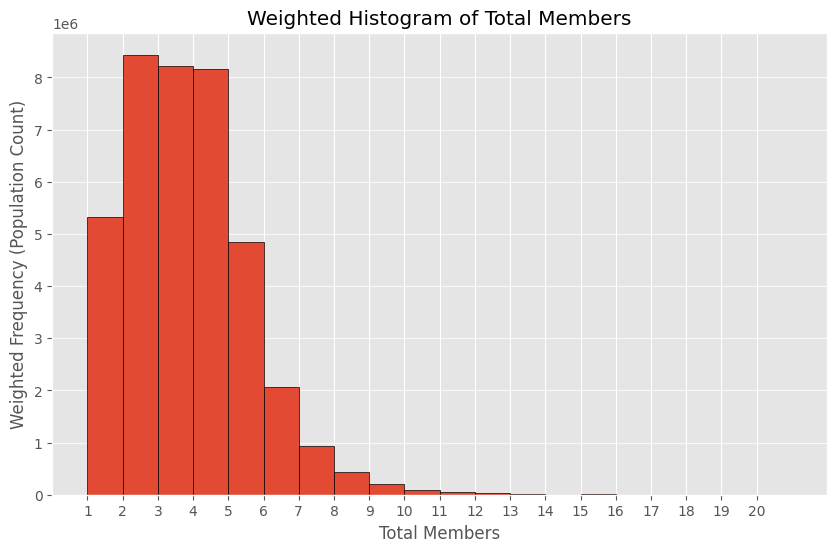

In [26]:
#
plt.figure(figsize=(10, 6))
plt.hist(df_sel['tot_integ'], weights=df_sel['factor'], bins=range(1, int(df_sel['tot_integ'].max()) + 2), edgecolor='black')
plt.title('Weighted Histogram of Total Members')
plt.xlabel('Total Members')
plt.ylabel('Weighted Frequency (Population Count)')
plt.xticks(range(1, int(df_sel['tot_integ'].max()) + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [27]:
#
df_sel[['edad_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'percep_ing', 'ing_cor', 'ingtrab', 'bene_gob', 'gasto_mon',
       'alimentos', 'vesti_calz', 'energia', 'salud']].describe()

,edad_jefe,tot_integ,hombres,mujeres,mayores,menores,percep_ing,ing_cor,ingtrab,bene_gob,gasto_mon,alimentos,vesti_calz,energia,salud
count,91414.000000,91414.000000,91414.000000,91414.000000,91414.000000,91414.000000,91414.000000,9.141400e+04,9.141400e+04,91414.000000,9.141400e+04,91414.000000,91414.000000,91414.000000,91414.000000
mean,51.537281,3.374439,1.627191,1.747249,2.761109,0.613331,2.193034,7.227359e+04,4.744601e+04,2598.137472,4.341137e+04,16356.844396,1634.648645,1775.943491,1523.127320
std,15.994928,1.754476,1.100651,1.162176,1.352481,0.915634,1.148934,9.387659e+04,5.185134e+04,4871.012110,3.869615e+04,11752.844387,2803.709656,1814.441026,6310.146994
min,14.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,39.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,3.452087e+04,1.458293e+04,0.000000,2.152433e+04,8718.290000,0.000000,570.000000,0.000000
50%,51.000000,3.000000,1.000000,2.000000,2.000000,0.000000,2.000000,5.566618e+04,3.641086e+04,0.000000,3.418251e+04,13898.410000,782.590000,1391.120000,190.750000
75%,63.000000,4.000000,2.000000,2.000000,4.000000,1.000000,3.000000,8.884073e+04,6.500962e+04,3245.900000,5.304713e+04,20892.707500,2054.340000,2341.930000,1041.562500
max,106.000000,20.000000,13.000000,11.000000,15.000000,9.000000,14.000000,1.743198e+07,2.347826e+06,164367.370000,1.635931e+06,314459.880000,110152.140000,69000.000000,493043.470000


In [28]:
#
df_sel[['edad_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'percep_ing', 'ing_cor', 'ingtrab', 'bene_gob', 'gasto_mon',
       'alimentos', 'vesti_calz', 'energia', 'salud']][df_sel['salud'] > 0].describe()

,edad_jefe,tot_integ,hombres,mujeres,mayores,menores,percep_ing,ing_cor,ingtrab,bene_gob,gasto_mon,alimentos,vesti_calz,energia,salud
count,56719.000000,56719.000000,56719.000000,56719.000000,56719.000000,56719.000000,56719.000000,5.671900e+04,5.671900e+04,56719.000000,5.671900e+04,56719.000000,56719.000000,56719.000000,56719.000000
mean,51.902361,3.499074,1.669582,1.829493,2.856909,0.642166,2.311183,7.676283e+04,4.990100e+04,2792.054805,4.777329e+04,17250.617735,1877.641638,1838.437385,2454.823971
std,15.996088,1.762363,1.115169,1.166867,1.367338,0.924867,1.187889,1.057625e+05,5.533119e+04,5058.843279,4.256965e+04,12184.696324,3023.455094,1851.082595,7866.881682
min,15.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.600700e+02,0.000000,0.000000,0.000000,3.910000
25%,39.000000,2.000000,1.000000,1.000000,2.000000,0.000000,1.000000,3.649174e+04,1.567731e+04,0.000000,2.395597e+04,9385.555000,146.730000,600.000000,251.390000
50%,51.000000,3.000000,1.000000,2.000000,3.000000,0.000000,2.000000,5.871015e+04,3.802077e+04,0.000000,3.739170e+04,14695.530000,978.240000,1457.850000,714.120000
75%,64.000000,4.000000,2.000000,2.000000,4.000000,1.000000,3.000000,9.407377e+04,6.812354e+04,4436.060000,5.784187e+04,21963.045000,2382.010000,2392.930000,2005.420000
max,106.000000,20.000000,13.000000,11.000000,15.000000,9.000000,14.000000,1.743198e+07,2.347826e+06,146739.130000,1.635931e+06,314459.880000,101592.370000,69000.000000,493043.470000


In [29]:
#
Data = df_sel[['edad_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'percep_ing', 'ing_cor', 'ingtrab', 'bene_gob', 'gasto_mon',
       'alimentos', 'vesti_calz', 'energia', 'tam_loc_2',
       'tam_loc_3', 'tam_loc_4', 'sexo_jefe_2', 'salud']][df_sel['salud'] > 0]

Data.shape, df.shape

((56719, 19), (91414, 126))

In [30]:
#
y = Data['salud']

data = Data[['edad_jefe', 'tot_integ', 'hombres', 'mujeres', 'mayores',
       'menores', 'percep_ing', 'ing_cor', 'ingtrab', 'bene_gob', 'gasto_mon',
       'alimentos', 'vesti_calz', 'energia', 'tam_loc_2',
       'tam_loc_3', 'tam_loc_4', 'sexo_jefe_2']]

Text(0.5, 1.0, 'Correlation value between variables')

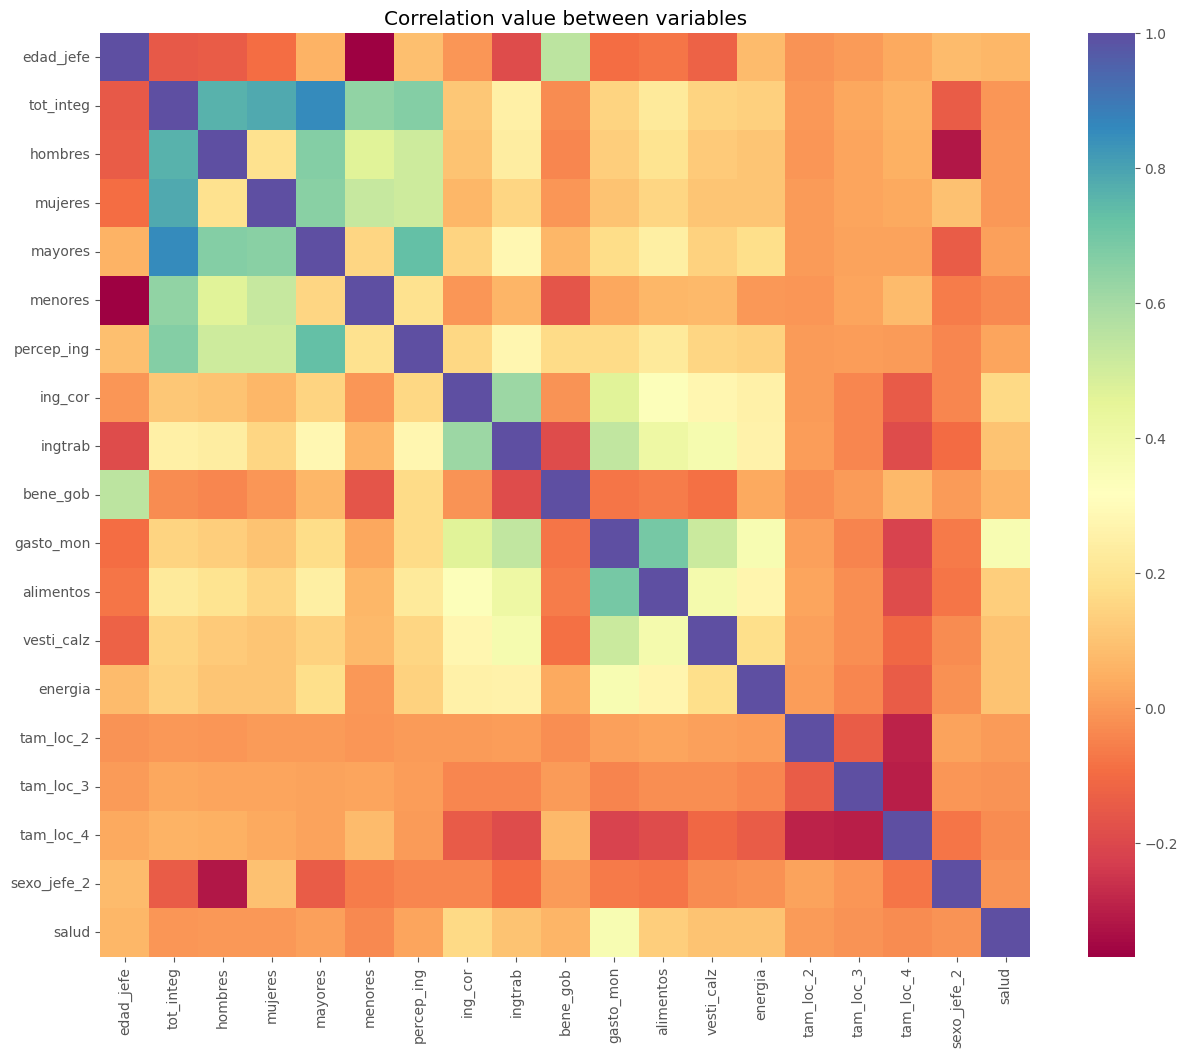

In [31]:
# Correlation study

plt.figure( figsize = (15, 12) )
sns.heatmap( Data.corr(), cmap = 'Spectral' )
plt.title( "Correlation value between variables" )

In [32]:
#
n = data.shape[1]
fa = FactorAnalyzer( rotation = None, impute = "drop", n_factors=n)
fa.fit(data)
ev,_ = fa.get_eigenvalues()

ev

array([ 4.48594417e+00,  2.62521589e+00,  1.83121699e+00,  1.33298998e+00,
        1.18673002e+00,  1.12298227e+00,  8.79017546e-01,  8.23593548e-01,
        7.42033684e-01,  6.30867984e-01,  5.87684808e-01,  4.52261683e-01,
        4.16738140e-01,  3.26602197e-01,  3.01144816e-01,  2.54976269e-01,
       -4.82363101e-16, -2.53141698e-15])

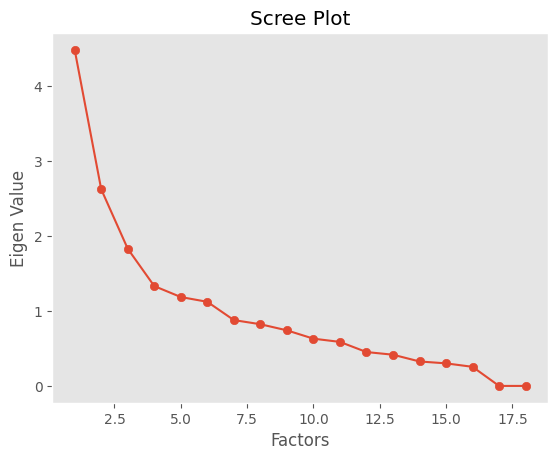

In [33]:
#
plt.scatter( range(1,n+1) , ev)
plt.plot( range(1,n+1) , ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

### Factor Loading

Factor loading can tell us how each factor created is explaining each of the variable. More value says that factor explains well about that variable. Sorting the factor load values helps us understand which variables are grouped to represent a new factor.

In [34]:
#
fa = FactorAnalyzer( n_factors = 5, rotation = 'varimax' )
fa.fit( data )
fa_load = pd.DataFrame( fa.loadings_ , index=data.columns )

fa_load

,0,1,2,3,4
edad_jefe,-0.026424,-0.061207,0.817243,-0.078025,0.017131
tot_integ,0.954481,0.126446,-0.149732,0.267097,-0.004708
hombres,0.549934,0.104403,-0.099958,0.823375,-0.026942
mujeres,0.916019,0.091199,-0.130617,-0.383488,0.018638
mayores,0.797618,0.221378,0.192237,0.272139,-0.025590
menores,0.497730,-0.047885,-0.460119,0.092334,0.033014
percep_ing,0.661664,0.225071,0.222871,0.184935,-0.015708
ing_cor,0.025575,0.604858,0.018898,0.038161,-0.006124
ingtrab,0.123450,0.694924,-0.138821,0.120278,-0.035316
bene_gob,0.067920,-0.079516,0.593931,-0.020157,0.048549


In [35]:
def highlight_max(s):
    # Get 5 largest values of the column
    is_large = s.nlargest(5).values
    # Apply style is the current value is among the 5 biggest values
    return ['background-color: yellow' if v in is_large else '' for v in s]

fa_load.sort_values(by=0,ascending=False).style.apply(highlight_max)

,0,1,2,3,4
tot_integ,0.954481,0.126446,-0.149732,0.267097,-0.004708
mujeres,0.916019,0.091199,-0.130617,-0.383488,0.018638
mayores,0.797618,0.221378,0.192237,0.272139,-0.025590
percep_ing,0.661664,0.225071,0.222871,0.184935,-0.015708
hombres,0.549934,0.104403,-0.099958,0.823375,-0.026942
menores,0.497730,-0.047885,-0.460119,0.092334,0.033014
ingtrab,0.123450,0.694924,-0.138821,0.120278,-0.035316
alimentos,0.118550,0.664263,-0.041620,0.058041,-0.034407
energia,0.090017,0.393399,0.105455,0.013497,-0.045008
tam_loc_4,0.077368,-0.243556,0.018346,0.077509,0.975852


In [36]:
#
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4
Variance          3.429812  2.696632  1.418094  1.172825  1.094318
Proportional Var  0.190545  0.149813  0.078783  0.065157  0.060795
Cumulative Var    0.190545  0.340358  0.419141  0.484298  0.545093


**The new 5 factors created can explain 54.5% variance in the data.**

### Model Prediction

In [37]:
#
X = data.copy()

X.shape, y.shape

((56719, 18), (56719,))

In [38]:
#
transformer = FactorAnalysis( n_components = 5, random_state = 0 )
X_transformed = transformer.fit_transform(X)
X_transformed.shape

(56719, 5)

In [39]:
#
X_transformed

array([[-0.28240477, -0.10681452,  0.63568349,  0.1334115 , -0.53919031],
       [ 0.32067436, -0.83127215,  0.08133389, -0.98374427, -0.36296502],
       [ 0.21755378, -0.89373347, -1.91525627,  0.66543404, -0.37909689],
       ...,
       [ 0.10540893, -0.7089674 , -0.17256133, -0.49050864, -0.39990198],
       [-0.24874346, -0.00436016,  1.05922962,  0.19952961,  0.08116289],
       [-0.48522409,  0.25844254,  0.38136481, -0.3372224 , -0.6293291 ]])

In [40]:
#
import statsmodels.api as sm

X = np.asarray(X, dtype="float64")     # asegura numérico
y = np.asarray(y, dtype="float64")

X = sm.add_constant(X, has_constant='add')
ols = sm.OLS(y, X).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     828.4
Date:                Wed, 12 Nov 2025   Prob (F-statistic):               0.00
Time:                        20:09:41   Log-Likelihood:            -5.8332e+05
No. Observations:               56719   AIC:                         1.167e+06
Df Residuals:                   56702   BIC:                         1.167e+06
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1585.7282    150.538    -10.534      0.0

In [41]:
#
ols = sm.OLS(y, X_transformed).fit()
print(ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.161
Model:                            OLS   Adj. R-squared (uncentered):              0.161
Method:                 Least Squares   F-statistic:                              2180.
Date:                Wed, 12 Nov 2025   Prob (F-statistic):                        0.00
Time:                        20:09:41   Log-Likelihood:                     -5.8692e+05
No. Observations:               56719   AIC:                                  1.174e+06
Df Residuals:                   56714   BIC:                                  1.174e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------